<a href="https://colab.research.google.com/github/MiltonGallardo/MiltonGallardo/blob/main/Copia_de_Proyecto2_Parte2_custSeg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Archivo proyecto 2

# Limpiar y explorar los datos que seleccionaste. Verificar la calidad de los datos: ¿necesitas lidiar con los valores faltantes? ¿Hay valores atípicos? Etc. También comienza a explorar tus datos: busca tendencias, crea visualizaciones, etc.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ PTCienciaDeDatos/PandasParaManipulaciónDeDatos/SegNatural_Infusion.csv')
df

,Id,SufreColico,FormaPeriodo,TipoDolor,ProductoDolor,MarcaUtilizDolor,VentajaMarca,TabletaTomada,LugarCompra,FrecuenciaConsumoMarca,HaTomadoInfusion,InfusionDePreferencia,VentajaInfusionPreferenc,InteresNewProd,CaracterImpNewProd,ComprariaNewProd,PresentacionNewProd,DosisNewProd,BNC,BC,CNC,CC,LugarVentaNewProd,PromocionNewProd,PublcNewProd,RRSSNewProd,KitInfoNewProd,AfectacionEmocional,Edad,Ocupacion
0,1,2,Regular,5,Ninguna,Femen,Facil de conseguir,1 a 2 tabletas,Tienda,rara vez,2,Manzanilla,Facil de conseguir,3,Accesibilidad,3,0.5 Litro,1 sobre de infusion para 2 dosis,0.30,0.50,0.7,0.60,2,Muestras gratis,3,3,Control a traves calor corporal,4,< 20,Otras
1,2,1,Regular,3,Ninguna,Ninguna,Ninguna,2 tabletas,NaN,nunca,1,Otras,Rapidez de accion,3,Antinflamatorios,3,"0,25 Litros",1 sobre de infusion para 1 dosis,0.40,0.30,0.7,0.50,4,2x1,3,3,Control a traves del ejercicio,3,21-30,Ejecutiva
2,3,1,Regular,4,Pastillas,Femen,Facil de conseguir,3 a 4 tabletas,Farmacia,cada mes,1,Manzanilla,Facil de conseguir,4,Calma el dolor,4,0.5 Litro,1 sobre de infusion para 1 dosis,0.31,0.70,0.7,0.70,4,2x1,3,5,Control a traves infusion natural,1,31-40,Ejecutiva
3,4,1,Irregular,3,Pastillas,Femen,Facil de conseguir,1 a 2 tabletas,Farmacia,2 veces al mes,2,Manzanilla,Facil de conseguir,3,Calma el dolor,3,"0,25 Litros",1 sobre de infusion para 1 dosis,0.30,0.30,0.7,0.70,2,2x1,3,5,Control a traves infusion natural,4,31-40,Ejecutiva
4,5,1,Irregular,4,Pastillas,Femen,Rapidez de accion,3 a 4 tabletas,Farmacia,cada mes,1,Canela,Facil de conseguir,4,Efectividad,4,0.5 Litro,1 sobre de infusion para 1 dosis,0.30,0.50,0.7,0.60,2,2x1,4,5,Control a traves infusion natural,4,31-40,Ejecutiva
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,258,1,Regular,3,Pastillas,Femen,Facil de conseguir,1 a 2 tabletas,Farmacia,cada mes,2,Ninguna,Ninguna,4,Calma el dolor,3,0.5 Litro,1 sobre de infusion para 1 dosis,NaN,0.30,0.7,0.70,3,2x1,3,5,Control a traves del ejercicio,4,31-40,Ejecutiva
258,259,2,Regular,4,Te,Femen,Facil de conseguir,1 a 2 tabletas,Farmacia,rara vez,1,Manzanilla,Rapidez de accion,5,Relajante,5,0.5 Litro,1 sobre de infusion para 1 dosis,0.30,0.30,0.7,0.70,3,2x1,3,4,Control a traves infusion natural,4,21-30,Universitaria
259,260,1,Irregular,5,Pastillas,Femen,Rapidez de accion,1 a 2 tabletas,Farmacia,rara vez,1,Anis Estrellado,Rapidez de accion,4,Efectividad,4,0.5 Litro,1 sobre de infusion para 1 dosis,0.30,0.70,0.7,0.37,4,2x1,3,5,Control a traves infusion natural,3,21-30,Otras
260,261,2,Irregular,3,Pastillas,Femen,Rapidez de accion,1 a 2 tabletas,Farmacia,rara vez,2,Ninguna,Ninguna,4,Calma el dolor,4,"0,25 Litros",1 sobre de infusion para 1 dosis,0.30,0.33,0.7,0.70,2,2x1,3,4,Control a traves infusion natural,4,31-40,Universitaria


In [ ]:
df.columns

Index(['Id', 'SufreColico', 'FormaPeriodo', 'TipoDolor', 'ProductoDolor',
       'MarcaUtilizDolor', 'VentajaMarca', 'TabletaTomada', 'LugarCompra',
       'FrecuenciaConsumoMarca', 'HaTomadoInfusion', 'InfusionDePreferencia',
       'VentajaInfusionPreferenc', 'InteresNewProd', 'CaracterImpNewProd',
       'ComprariaNewProd', 'PresentacionNewProd', 'DosisNewProd', 'BNC', 'BC',
       'CNC', 'CC', 'LugarVentaNewProd', 'PromocionNewProd', 'PublcNewProd',
       'RRSSNewProd', 'KitInfoNewProd', 'AfectacionEmocional', 'Edad',
       'Ocupacion '],
      dtype='object')

In [ ]:
# Eliminar columnas
df1=df.drop(columns=['ProductoDolor','MarcaUtilizDolor','VentajaMarca','TabletaTomada','LugarCompra','FrecuenciaConsumoMarca','InfusionDePreferencia','VentajaInfusionPreferenc','PresentacionNewProd','DosisNewProd'])
df1.head()

,Id,SufreColico,FormaPeriodo,TipoDolor,HaTomadoInfusion,InteresNewProd,CaracterImpNewProd,ComprariaNewProd,BNC,BC,CNC,CC,LugarVentaNewProd,PromocionNewProd,PublcNewProd,RRSSNewProd,KitInfoNewProd,AfectacionEmocional,Edad,Ocupacion
0,1,2,Regular,5,2,3,Accesibilidad,3,0.30,0.5,0.7,0.6,2,Muestras gratis,3,3,Control a traves calor corporal,4,< 20,Otras
1,2,1,Regular,3,1,3,Antinflamatorios,3,0.40,0.3,0.7,0.5,4,2x1,3,3,Control a traves del ejercicio,3,21-30,Ejecutiva
2,3,1,Regular,4,1,4,Calma el dolor,4,0.31,0.7,0.7,0.7,4,2x1,3,5,Control a traves infusion natural,1,31-40,Ejecutiva
3,4,1,Irregular,3,2,3,Calma el dolor,3,0.30,0.3,0.7,0.7,2,2x1,3,5,Control a traves infusion natural,4,31-40,Ejecutiva
4,5,1,Irregular,4,1,4,Efectividad,4,0.30,0.5,0.7,0.6,2,2x1,4,5,Control a traves infusion natural,4,31-40,Ejecutiva


In [ ]:
# contar nulos
df1.isnull().sum()

Id                      0
SufreColico             0
FormaPeriodo            0
TipoDolor               0
HaTomadoInfusion        0
InteresNewProd          0
CaracterImpNewProd      0
ComprariaNewProd        0
BNC                    18
BC                      2
CNC                    12
CC                     13
LugarVentaNewProd       0
PromocionNewProd        0
PublcNewProd            0
RRSSNewProd             0
KitInfoNewProd          0
AfectacionEmocional     0
Edad                    0
Ocupacion               0
dtype: int64

In [ ]:
# Ver nulos por caracteristicas
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   262 non-null    int64  
 1   SufreColico          262 non-null    int64  
 2   FormaPeriodo         262 non-null    object 
 3   TipoDolor            262 non-null    int64  
 4   HaTomadoInfusion     262 non-null    int64  
 5   InteresNewProd       262 non-null    int64  
 6   CaracterImpNewProd   262 non-null    object 
 7   ComprariaNewProd     262 non-null    int64  
 8   BNC                  244 non-null    float64
 9   BC                   260 non-null    float64
 10  CNC                  250 non-null    float64
 11  CC                   249 non-null    float64
 12  LugarVentaNewProd    262 non-null    int64  
 13  PromocionNewProd     262 non-null    object 
 14  PublcNewProd         262 non-null    int64  
 15  RRSSNewProd          262 non-null    int

In [ ]:
# Eliminar datos falatantes en las filas
df1.dropna(inplace=True)
df1.isnull().sum()

Id                     0
SufreColico            0
FormaPeriodo           0
TipoDolor              0
HaTomadoInfusion       0
InteresNewProd         0
CaracterImpNewProd     0
ComprariaNewProd       0
BNC                    0
BC                     0
CNC                    0
CC                     0
LugarVentaNewProd      0
PromocionNewProd       0
PublcNewProd           0
RRSSNewProd            0
KitInfoNewProd         0
AfectacionEmocional    0
Edad                   0
Ocupacion              0
dtype: int64

In [ ]:
# ver como queda el formato
df1.shape


(234, 20)

In [ ]:
df1

,Id,SufreColico,FormaPeriodo,TipoDolor,HaTomadoInfusion,InteresNewProd,CaracterImpNewProd,ComprariaNewProd,BNC,BC,CNC,CC,LugarVentaNewProd,PromocionNewProd,PublcNewProd,RRSSNewProd,KitInfoNewProd,AfectacionEmocional,Edad,Ocupacion
0,1,2,Regular,5,2,3,Accesibilidad,3,0.30,0.50,0.7,0.60,2,Muestras gratis,3,3,Control a traves calor corporal,4,< 20,Otras
1,2,1,Regular,3,1,3,Antinflamatorios,3,0.40,0.30,0.7,0.50,4,2x1,3,3,Control a traves del ejercicio,3,21-30,Ejecutiva
2,3,1,Regular,4,1,4,Calma el dolor,4,0.31,0.70,0.7,0.70,4,2x1,3,5,Control a traves infusion natural,1,31-40,Ejecutiva
3,4,1,Irregular,3,2,3,Calma el dolor,3,0.30,0.30,0.7,0.70,2,2x1,3,5,Control a traves infusion natural,4,31-40,Ejecutiva
4,5,1,Irregular,4,1,4,Efectividad,4,0.30,0.50,0.7,0.60,2,2x1,4,5,Control a traves infusion natural,4,31-40,Ejecutiva
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,257,1,Regular,3,1,3,Efectividad,3,0.30,0.30,0.7,0.50,4,Descuentos hasta el 30%,3,5,Control a traves del ejercicio,3,31-40,Ejecutiva
258,259,2,Regular,4,1,5,Relajante,5,0.30,0.30,0.7,0.70,3,2x1,3,4,Control a traves infusion natural,4,21-30,Universitaria
259,260,1,Irregular,5,1,4,Efectividad,4,0.30,0.70,0.7,0.37,4,2x1,3,5,Control a traves infusion natural,3,21-30,Otras
260,261,2,Irregular,3,2,4,Calma el dolor,4,0.30,0.33,0.7,0.70,2,2x1,3,4,Control a traves infusion natural,4,31-40,Universitaria


In [ ]:
# Cambiar variables 


In [ ]:
df1.corr()

,Id,SufreColico,TipoDolor,HaTomadoInfusion,InteresNewProd,ComprariaNewProd,BNC,BC,CNC,CC,LugarVentaNewProd,PublcNewProd,RRSSNewProd,AfectacionEmocional
Id,1.000000,-0.072427,-0.018249,-0.048444,-0.075620,-0.075251,0.075430,0.023869,0.003510,0.089665,0.032673,-0.042856,0.008177,0.009166
SufreColico,-0.072427,1.000000,-0.399935,0.142948,-0.169420,-0.188114,-0.059101,-0.074294,0.038678,-0.061140,0.083879,-0.094188,0.074374,-0.161938
TipoDolor,-0.018249,-0.399935,1.000000,-0.156553,0.103710,0.111371,0.022687,0.028871,-0.026921,0.025858,0.142985,0.126766,-0.068712,0.004781
HaTomadoInfusion,-0.048444,0.142948,-0.156553,1.000000,-0.241874,-0.242936,-0.002039,0.080210,0.068628,-0.063365,0.008641,0.061182,-0.020466,-0.023149
InteresNewProd,-0.075620,-0.169420,0.103710,-0.241874,1.000000,0.813949,0.027572,-0.006299,-0.029075,-0.086364,0.010502,-0.078302,-0.091160,0.184970
ComprariaNewProd,-0.075251,-0.188114,0.111371,-0.242936,0.813949,1.000000,0.071318,0.081442,-0.077323,-0.055624,-0.050497,-0.095283,-0.099237,0.193292
BNC,0.075430,-0.059101,0.022687,-0.002039,0.027572,0.071318,1.000000,0.464751,-0.010537,0.198689,-0.122475,-0.023783,-0.066339,0.087762
BC,0.023869,-0.074294,0.028871,0.080210,-0.006299,0.081442,0.464751,1.000000,-0.013050,0.253351,0.004531,-0.022212,-0.045369,0.102277
CNC,0.003510,0.038678,-0.026921,0.068628,-0.029075,-0.077323,-0.010537,-0.013050,1.000000,-0.008764,-0.050391,-0.014419,-0.014499,-0.109111
CC,0.089665,-0.061140,0.025858,-0.063365,-0.086364,-0.055624,0.198689,0.253351,-0.008764,1.000000,-0.040141,-0.019030,-0.014696,0.031958


In [ ]:
df1.corr().sort_values(by=['ComprariaNewProd'])

,Id,SufreColico,TipoDolor,HaTomadoInfusion,InteresNewProd,ComprariaNewProd,BNC,BC,CNC,CC,LugarVentaNewProd,PublcNewProd,RRSSNewProd,AfectacionEmocional
HaTomadoInfusion,-0.048444,0.142948,-0.156553,1.000000,-0.241874,-0.242936,-0.002039,0.080210,0.068628,-0.063365,0.008641,0.061182,-0.020466,-0.023149
SufreColico,-0.072427,1.000000,-0.399935,0.142948,-0.169420,-0.188114,-0.059101,-0.074294,0.038678,-0.061140,0.083879,-0.094188,0.074374,-0.161938
RRSSNewProd,0.008177,0.074374,-0.068712,-0.020466,-0.091160,-0.099237,-0.066339,-0.045369,-0.014499,-0.014696,0.108456,0.017398,1.000000,-0.094057
PublcNewProd,-0.042856,-0.094188,0.126766,0.061182,-0.078302,-0.095283,-0.023783,-0.022212,-0.014419,-0.019030,0.038921,1.000000,0.017398,0.071350
CNC,0.003510,0.038678,-0.026921,0.068628,-0.029075,-0.077323,-0.010537,-0.013050,1.000000,-0.008764,-0.050391,-0.014419,-0.014499,-0.109111
Id,1.000000,-0.072427,-0.018249,-0.048444,-0.075620,-0.075251,0.075430,0.023869,0.003510,0.089665,0.032673,-0.042856,0.008177,0.009166
CC,0.089665,-0.061140,0.025858,-0.063365,-0.086364,-0.055624,0.198689,0.253351,-0.008764,1.000000,-0.040141,-0.019030,-0.014696,0.031958
LugarVentaNewProd,0.032673,0.083879,0.142985,0.008641,0.010502,-0.050497,-0.122475,0.004531,-0.050391,-0.040141,1.000000,0.038921,0.108456,0.020314
BNC,0.075430,-0.059101,0.022687,-0.002039,0.027572,0.071318,1.000000,0.464751,-0.010537,0.198689,-0.122475,-0.023783,-0.066339,0.087762
BC,0.023869,-0.074294,0.028871,0.080210,-0.006299,0.081442,0.464751,1.000000,-0.013050,0.253351,0.004531,-0.022212,-0.045369,0.102277


In [ ]:
df1.loc[:,['ComprariaNewProd', 'InteresNewProd']]
df2=df1.loc[:,['ComprariaNewProd', 'InteresNewProd']]
df2


,ComprariaNewProd,InteresNewProd
0,3,3
1,3,3
2,4,4
3,3,3
4,4,4
...,...,...
256,3,3
258,5,5
259,4,4
260,4,4


In [ ]:
# Instancia de escalador estándar
scaler = StandardScaler()
# Ajustar y transformar datos
scaled_df2 = scaler.fit_transform(df2)

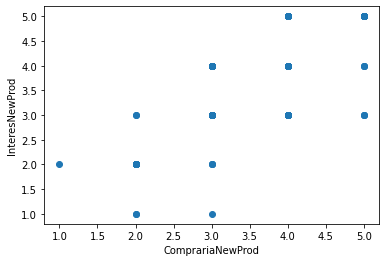

In [ ]:
# Visualizar datos
plt.scatter(df2['ComprariaNewProd'], df2['InteresNewProd'])
plt.xlabel('ComprariaNewProd')
plt.ylabel('InteresNewProd');


In [ ]:
import seaborn as sns

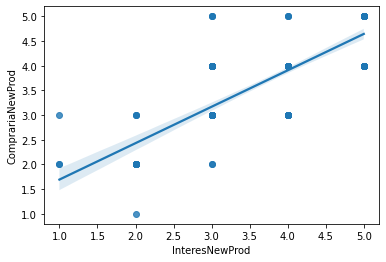

In [ ]:
sns.regplot(x="InteresNewProd", y="ComprariaNewProd", data=df2)

In [ ]:
# Instanciar KMeans
kmeans = KMeans(n_clusters = 5)
kmeans.fit(scaled_df2)

KMeans(n_clusters=5)

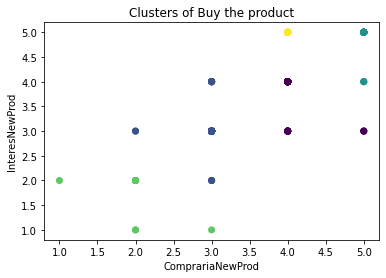

In [ ]:
# Guarde las etiquetas del clúster en el marco de datos 
df2['cluster'] = kmeans.labels_
# Visualiza los clusters
plt.scatter(df2['ComprariaNewProd'], df2['InteresNewProd'], c = df2['cluster'])
plt.xlabel('ComprariaNewProd')
plt.ylabel('InteresNewProd')
plt.title('Clusters of Buy the product');

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:

# Instanciar Escalador Estándar 
scaler = StandardScaler()
# Ajustar y transformar datos
scaled_df = scaler.fit_transform(df2)

In [ ]:
# Crear una instancia y ajustar la agrupación en clústeres: esto se hace en un solo paso para DBSCAN
dbs = DBSCAN(eps = 0.5, min_samples = 5).fit(scaled_df2)

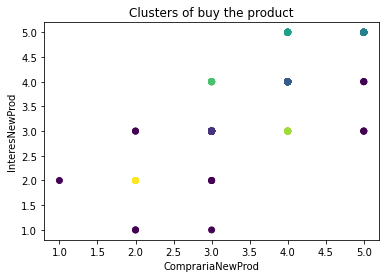

In [ ]:
# Guardar las etiquetas del clúster en el marco de datos
df2['cluster'] = dbs.labels_
# Visualiza los clusters
plt.scatter(df2['ComprariaNewProd'], df2['InteresNewProd'], c = df2['cluster'])
plt.xlabel('ComprariaNewProd')
plt.ylabel('InteresNewProd')
plt.title('Clusters of buy the product');